# K Nearest Neighbours

Objective: Predict abalone age  
Dataset: abalone.data  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('abalone.data', header=None)
print(data.shape)
data.head()

(4177, 9)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
#rename column
data.columns = ['Sex','Length','Diameter','Height','WholeHeight','ShuckedWeight','VisceraWeight','ShellWeight','RingsAge']
data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Exploration

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


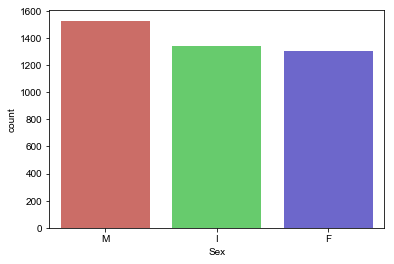

In [3]:
print(data['Sex'].value_counts())

sns.countplot(x='Sex',data = data, palette='hls',order = data['Sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [4]:
data['Sex']= data['Sex'].replace('M', 1)
data['Sex']= data['Sex'].replace('F', 0)
data['Sex']= data['Sex'].replace('I', 2)

data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Correlation

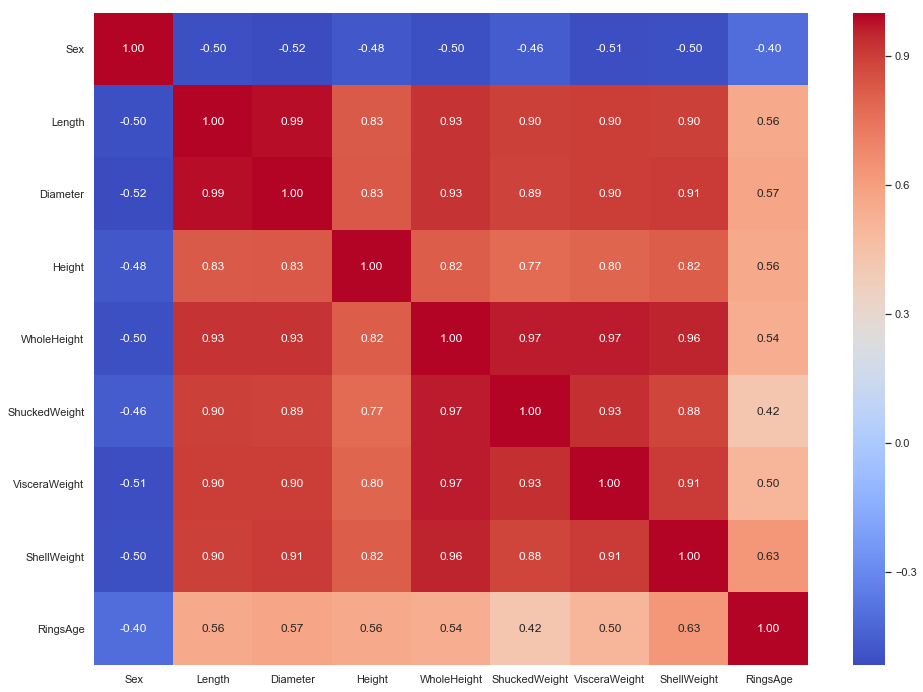

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["RingsAge"].sort_values(ascending=False)

RingsAge         1.000000
ShellWeight      0.627574
Diameter         0.574660
Height           0.557467
Length           0.556720
WholeHeight      0.540390
VisceraWeight    0.503819
ShuckedWeight    0.420884
Sex             -0.401445
Name: RingsAge, dtype: float64

## Data Processing and Selection

In [7]:
#Feature dataset
X=data.iloc[:, :-1] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (4177, 8)


,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07


In [8]:
#Target dataset
y = data["RingsAge"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (4177,)


0    15
1     7
2     9
3    10
4     7
Name: RingsAge, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (4177, 8)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[-0.0105225 , -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-0.0105225 , -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Train set:', X_train.shape, y_train.shape)
print('Test Set :', X_test.shape, y_test.shape)

Train set: (2923, 8) (2923,)
Test Set : (1254, 8) (1254,)


## K Nearest Neighbour

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[0.2089 0.2169 0.201  0.2065 0.2177 0.2145 0.2145 0.2209 0.2281 0.2281
 0.2321 0.2384 0.2512 0.2568]


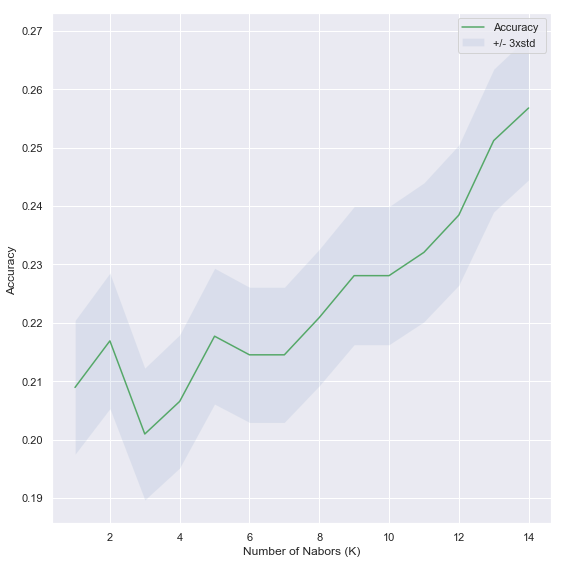

The best accuracy was 0.2568 with k= 14


In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [13]:
print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(X_train)),4))
print("Test set Accuracy : ", round(metrics.accuracy_score(y_test, yhat),4))

Train set Accuracy:  0.3503
Test set Accuracy :  0.2568


## Test Prediction

In [14]:
df_pred1 = data[data.index == 105]
df_pred2 = data[data.index == 120]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
105,0,0.52,0.410,0.155,0.7270,0.291,0.1835,0.235,12
120,0,0.47,0.365,0.105,0.4205,0.163,0.1035,0.140,9


In [15]:
Xp = df_pred.iloc[:, :-1]
yp = df_pred["RingsAge"]
Xp = scaler.transform(Xp)

pred = neigh.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([9, 8], dtype=int64)